# EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Stroke Prediction/healthcare-dataset-stroke-data.csv')
df = df.drop(columns='id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [66]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## ตรวจสอบ Missing Value

In [67]:
# ตรวจสอบ na ในข้อมูล
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [68]:
print((df.isna().sum()/len(df))*100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


พบ Missing Value จาก bmi column คิดเป็น 4% ของข้อมูลทั้งหมด

In [69]:
# ดูว่ามี na ที่ bmi column ตรง record ไหนบ้าง
df[df.bmi.isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [70]:
# ลบข้อมูลที่มี Missing Value
df.dropna(how='any', inplace=True)

In [71]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

ข้อมูลไม่มี Missing Value แล้ว

## ดูแต่ละ Column

### gender

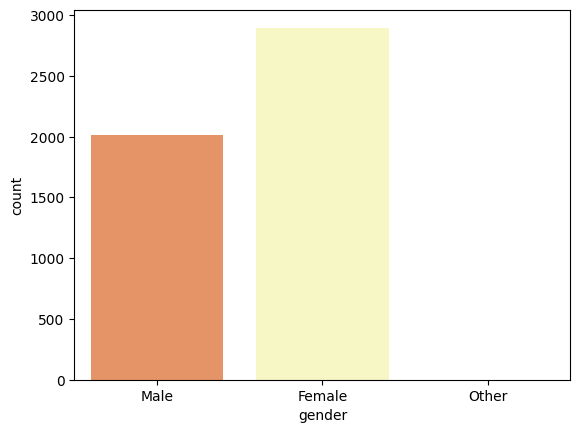

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['gender'], data=df, palette="Spectral")

In [73]:
pd.crosstab(df['gender'], columns='Count')

col_0,Count
gender,
Female,2897
Male,2011
Other,1


In [74]:
df.query("gender == 'Other'")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


### age

Text(0, 0.5, 'Count')

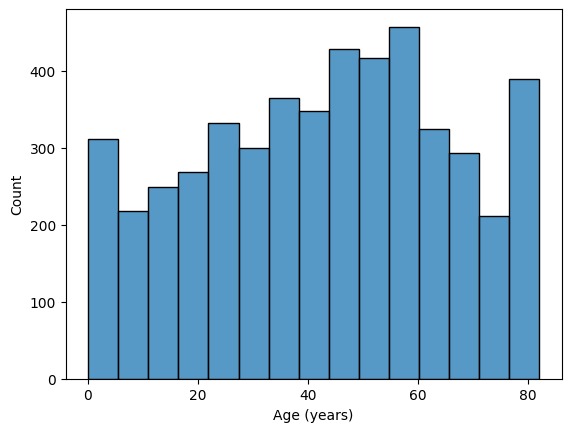

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
age_plot = sns.histplot(df['age'],
             bins=15,
             kde=False
            )
age_plot.set_xlabel("Age (years)")
age_plot.set_ylabel("Count")

<Axes: xlabel='age'>

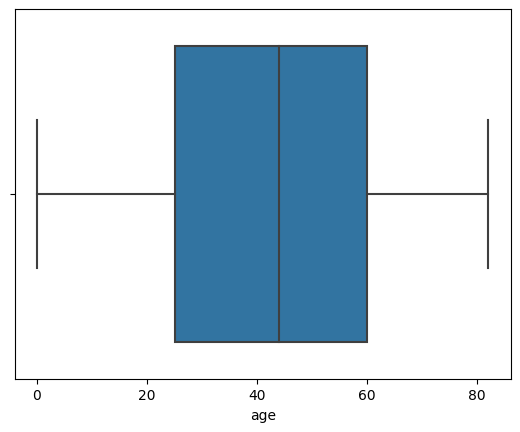

In [84]:
import seaborn as sns
sns.boxplot(data = df, x = 'age')

In [75]:
df.drop(df.query("gender == 'Other'").index, inplace=True)

### hypertension

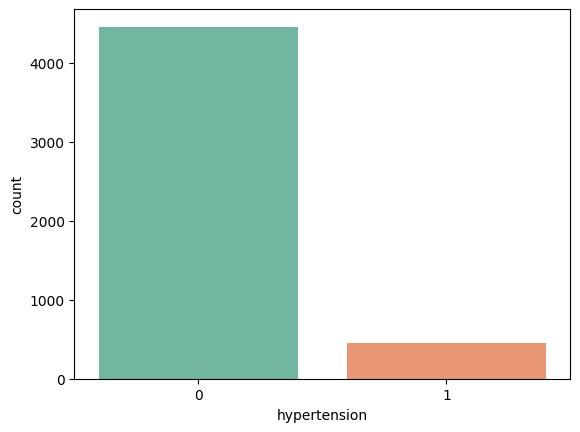

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['hypertension'], data=df, palette="Set2") # hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

In [77]:
pd.crosstab(df['hypertension'], columns='Count')

col_0,Count
hypertension,
0,4457
1,451


### heart_disease

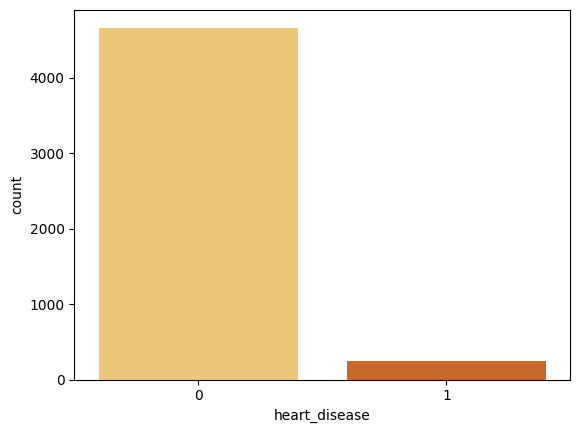

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['heart_disease'], data=df, palette="YlOrBr") # heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

### ever_married

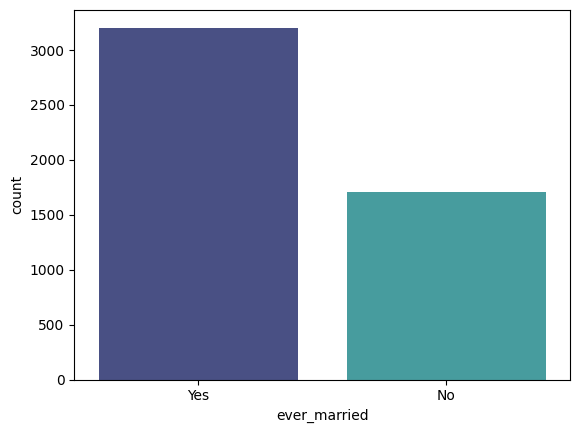

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['ever_married'], data=df, palette="mako")

### work_type

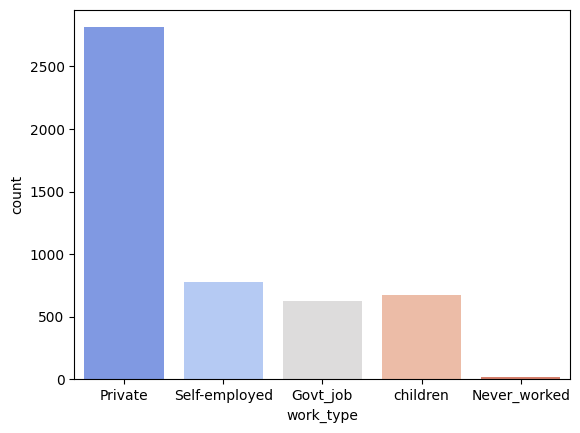

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['work_type'], data=df, palette="coolwarm")

### Residence_type

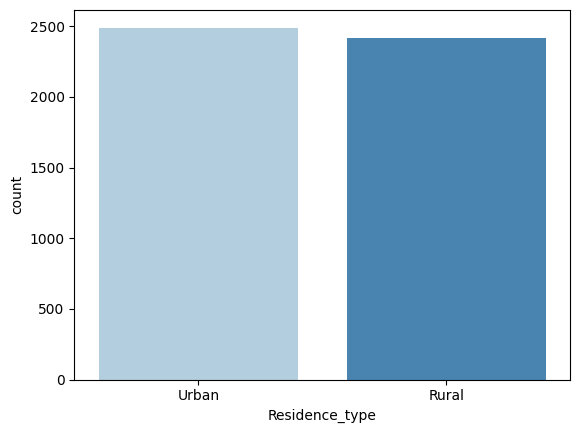

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['Residence_type'], data=df, palette="Blues")

### avg_glucose_level

Text(0, 0.5, 'Count')

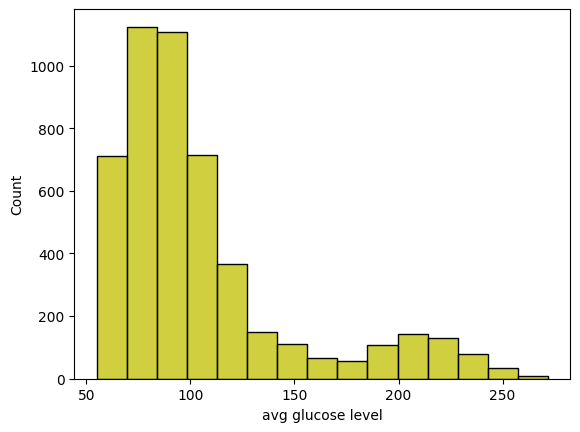

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
bmi_plot = sns.histplot(df['avg_glucose_level'],
             bins=15,
             kde=False,
             color="y"
            )
bmi_plot.set_xlabel("avg glucose level")
bmi_plot.set_ylabel("Count")

<Axes: xlabel='avg_glucose_level'>

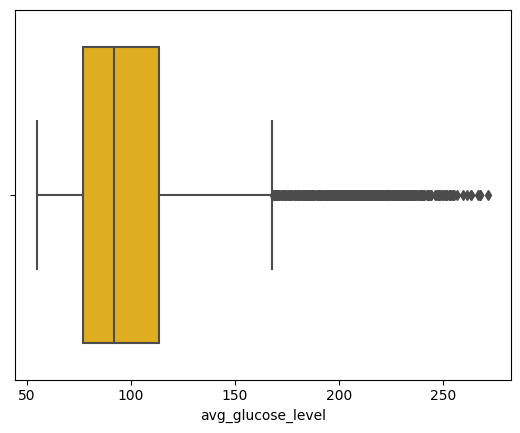

In [86]:
import seaborn as sns
sns.boxplot(data = df, x = 'avg_glucose_level', palette="Wistia")

### BMI

Text(0, 0.5, 'Count')

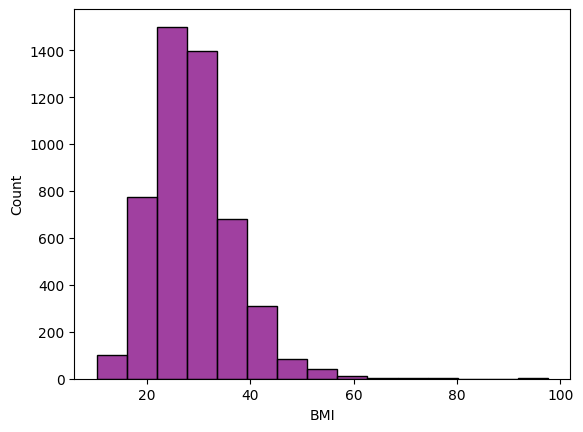

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
bmi_plot = sns.histplot(df['bmi'],
             bins=15,
             kde=False,
             color="purple"
            )
bmi_plot.set_xlabel("BMI")
bmi_plot.set_ylabel("Count")

<Axes: xlabel='bmi'>

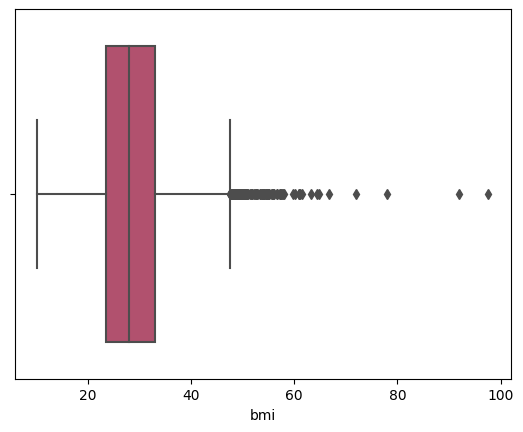

In [88]:
import seaborn as sns
sns.boxplot(data = df, x = 'bmi', palette="flare")

In [89]:
# ลองดูเฉย ๆ
df.query("bmi <= 13")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
657,Female,4.00,0,0,No,children,Urban,107.25,12.0,Unknown,0
922,Female,8.00,0,0,No,children,Urban,106.51,12.3,Unknown,0
1609,Female,1.24,0,0,No,children,Rural,122.04,10.3,Unknown,0
2187,Male,40.00,0,0,Yes,Private,Rural,60.96,11.5,never smoked,0
3307,Female,79.00,0,0,Yes,Self-employed,Urban,79.03,11.3,Unknown,0
3319,Female,1.08,0,0,No,children,Urban,159.39,12.8,Unknown,0
3968,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0


In [90]:
# ลองดูเฉย ๆ
df.query("bmi >= 60")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
270,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
358,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
466,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
544,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
1559,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
2764,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0
2840,Female,52.0,0,0,Yes,Private,Urban,98.27,61.2,Unknown,0
3825,Female,52.0,0,0,Yes,Private,Rural,118.46,61.6,smokes,0


### smoking_status

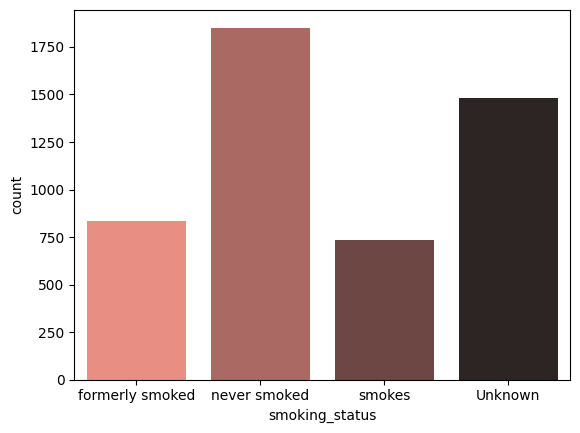

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['smoking_status'], data=df, palette="dark:salmon_r")

### stroke

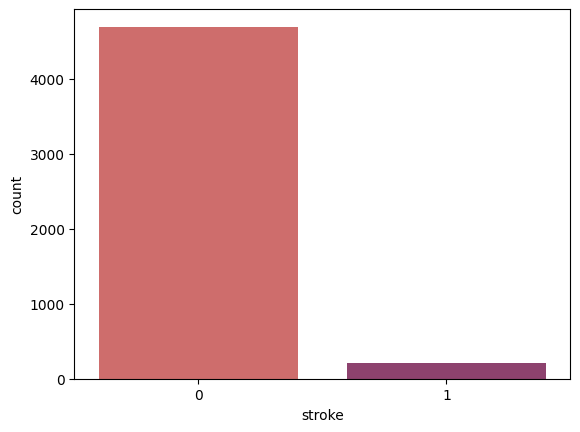

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['stroke'], data=df, palette="flare")

## save data

In [91]:
df.to_csv('healthcare-dataset-stroke-data-cleaned.csv', index=False)



---

